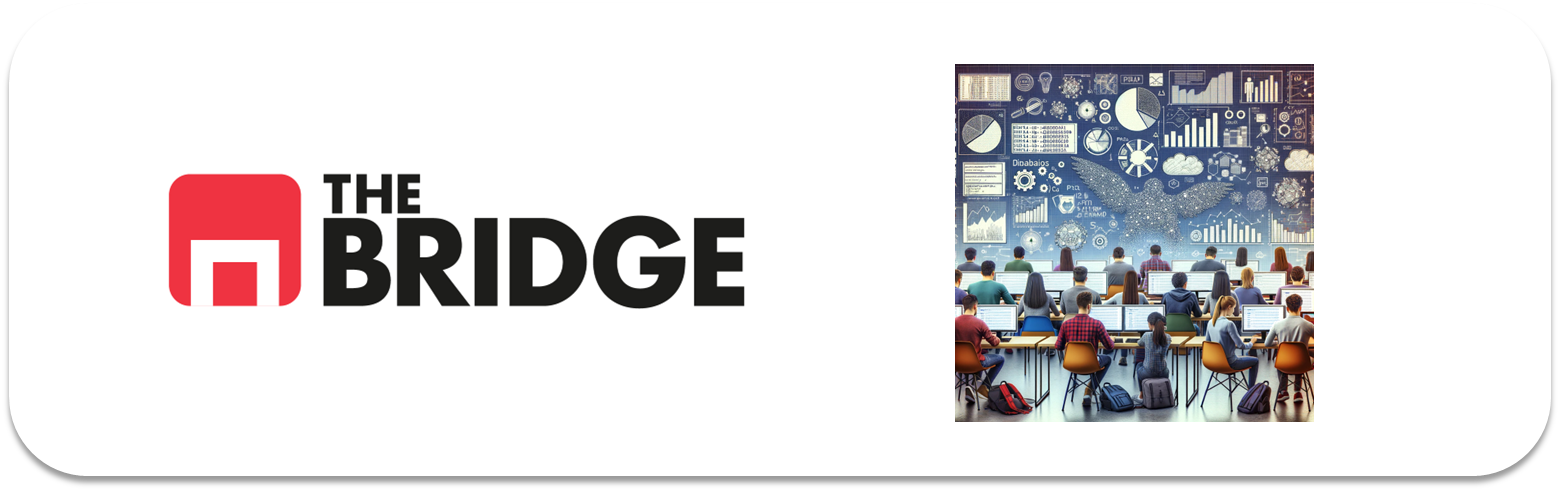

## PRACTICA OBLIGATORIA: **Clasificacion y Regresion Logistica**

* La práctica obligatoria de esta unidad consiste en modelar la supervivencia en el Titanic, por fin, además de una parte adicional multiclase. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
# Importamos las posibles librerías necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, accuracy_score, balanced_accuracy_score,\
                            roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay, \
                            classification_report, auc

from sklearn import linear_model
from sklearn import model_selection

from bootcampviztools import plot_combined_graphs

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión logística, evaluarlo contra un dataset de test reservado del original mostrando las métricas propias de los problemas de clasificación, la matriz de confusión y la curva ROC. Además se pide comparar las predicciones con los valores reales y al final adaptar el modelo a un problema multiclase.

Los pasos para guiar el trabajo:
1. Carga el dataset del Titanic. 
2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.
3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.
4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.
5. Construye las parejas X,y de train y test.
6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.
7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
8. Trata las variables para que funcionen lo mejor posible en el modelo.
9. Construye un modelo de regresión logística.
10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.
11. Procesa el dataset de Test para que puedas usarlo en la evaluación 
12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.
13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton en segunda clase, viajaba solo y no pagó el billete. PISTA: En este caso tendrás que calcular varias probabilidades y hacer la media de ellas.
14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  



In [2]:
# Cargamos el dataset y pegamos un vistazo a los datos

df = pd.read_csv("titanic.csv", sep=",")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
# Comprobamos si hay duplicados

df.duplicated(keep = False).value_counts()

False    731
True     160
Name: count, dtype: int64

In [4]:
# Eliminamos los duplicados

df = df.drop_duplicates(keep = 'last')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [5]:
# Comprobamos la información de los datos

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 784 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     784 non-null    int64  
 1   pclass       784 non-null    int64  
 2   sex          784 non-null    object 
 3   age          678 non-null    float64
 4   sibsp        784 non-null    int64  
 5   parch        784 non-null    int64  
 6   fare         784 non-null    float64
 7   embarked     782 non-null    object 
 8   class        784 non-null    object 
 9   who          784 non-null    object 
 10  adult_male   784 non-null    bool   
 11  deck         202 non-null    object 
 12  embark_town  782 non-null    object 
 13  alive        784 non-null    object 
 14  alone        784 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 87.3+ KB


*Hay nulos en las variables "age", "embarked", "deck" y "embark_town". Más adelante completaremos los nulos con las medias y modas*\
*Tenemos 7 variables tipo object y 2 variables tipo bool. Hay que tratarlas* \
*No vamos a eliminar ninguna columna*

In [6]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,784.000000,784.000000,678.000000,784.000000,784.000000,784.000000
mean,0.411990,2.243622,29.869351,0.522959,0.415816,34.711740
std,0.492507,0.855056,14.759076,0.986231,0.836922,52.160151
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,28.250000,0.000000,0.000000,15.900000
75%,1.000000,3.000000,39.000000,1.000000,1.000000,34.109350
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


*Hay variables que tienen rangos muy amplios (por ejemplo, "fare"), por lo que tendremos que estandarizar los datos*

Convertimos las variables tipo object y bool en numéricas para que el algoritmo de ML funcione correctamente

In [7]:
# Convertimos la variable "sex" en tipo numérico (0 - male, 1 - female)

df["sex"].value_counts()

sex
male      491
female    293
Name: count, dtype: int64

In [8]:
df["sex"] = df["sex"].replace({"male": 0, "female": 1})
df

C:\Users\ancar\AppData\Local\Temp\ipykernel_9408\3979347005.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["sex"] = df["sex"].replace({"male": 0, "female": 1})
C:\Users\ancar\AppData\Local\Temp\ipykernel_9408\3979347005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sex"] = df["sex"].replace({"male": 0, "female": 1})


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,1,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
5,0,3,0,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,1,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,1,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,0,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [9]:
# Convertimos la variable "embarked" en tipo numérico (0 - S, 1 - C, 2 - Q)

df["embarked"].value_counts()

embarked
S    568
C    155
Q     59
Name: count, dtype: int64

In [10]:
df["embarked"] = df["embarked"].replace({"S": 0, "C": 1, "Q": 2})
df

C:\Users\ancar\AppData\Local\Temp\ipykernel_9408\1476267696.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["embarked"] = df["embarked"].replace({"S": 0, "C": 1, "Q": 2})
C:\Users\ancar\AppData\Local\Temp\ipykernel_9408\1476267696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["embarked"] = df["embarked"].replace({"S": 0, "C": 1, "Q": 2})


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,0.0,Third,man,True,NaN,Southampton,no,False
1,1,1,1,38.0,1,0,71.2833,1.0,First,woman,False,C,Cherbourg,yes,False
2,1,3,1,26.0,0,0,7.9250,0.0,Third,woman,False,NaN,Southampton,yes,True
3,1,1,1,35.0,1,0,53.1000,0.0,First,woman,False,C,Southampton,yes,False
5,0,3,0,NaN,0,0,8.4583,2.0,Third,man,True,NaN,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0.0,Second,man,True,NaN,Southampton,no,True
887,1,1,1,19.0,0,0,30.0000,0.0,First,woman,False,B,Southampton,yes,True
888,0,3,1,NaN,1,2,23.4500,0.0,Third,woman,False,NaN,Southampton,no,False
889,1,1,0,26.0,0,0,30.0000,1.0,First,man,True,C,Cherbourg,yes,True


In [11]:
# Convertimos la variable "class" en tipo numérico (1 - First, 2 - Second, 3 - Third)

df["class"].value_counts()

class
Third     405
First     214
Second    165
Name: count, dtype: int64

In [12]:
df["class"] = df["class"].replace({"First": 1, "Second": 2, "Third": 3})
df

C:\Users\ancar\AppData\Local\Temp\ipykernel_9408\1609615437.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["class"] = df["class"].replace({"First": 1, "Second": 2, "Third": 3})
C:\Users\ancar\AppData\Local\Temp\ipykernel_9408\1609615437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["class"] = df["class"].replace({"First": 1, "Second": 2, "Third": 3})


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,0.0,3,man,True,NaN,Southampton,no,False
1,1,1,1,38.0,1,0,71.2833,1.0,1,woman,False,C,Cherbourg,yes,False
2,1,3,1,26.0,0,0,7.9250,0.0,3,woman,False,NaN,Southampton,yes,True
3,1,1,1,35.0,1,0,53.1000,0.0,1,woman,False,C,Southampton,yes,False
5,0,3,0,NaN,0,0,8.4583,2.0,3,man,True,NaN,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0.0,2,man,True,NaN,Southampton,no,True
887,1,1,1,19.0,0,0,30.0000,0.0,1,woman,False,B,Southampton,yes,True
888,0,3,1,NaN,1,2,23.4500,0.0,3,woman,False,NaN,Southampton,no,False
889,1,1,0,26.0,0,0,30.0000,1.0,1,man,True,C,Cherbourg,yes,True


In [13]:
# Convertimos la variable "who" en tipo numérico (0 - man, 1 - woman, 2 - child)

df["who"].value_counts()

who
man      451
woman    251
child     82
Name: count, dtype: int64

In [14]:
df["who"] = df["who"].replace({"man": 0, "woman": 1, "child": 2})
df

C:\Users\ancar\AppData\Local\Temp\ipykernel_9408\1097959183.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["who"] = df["who"].replace({"man": 0, "woman": 1, "child": 2})
C:\Users\ancar\AppData\Local\Temp\ipykernel_9408\1097959183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["who"] = df["who"].replace({"man": 0, "woman": 1, "child": 2})


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,0.0,3,0,True,NaN,Southampton,no,False
1,1,1,1,38.0,1,0,71.2833,1.0,1,1,False,C,Cherbourg,yes,False
2,1,3,1,26.0,0,0,7.9250,0.0,3,1,False,NaN,Southampton,yes,True
3,1,1,1,35.0,1,0,53.1000,0.0,1,1,False,C,Southampton,yes,False
5,0,3,0,NaN,0,0,8.4583,2.0,3,0,True,NaN,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0.0,2,0,True,NaN,Southampton,no,True
887,1,1,1,19.0,0,0,30.0000,0.0,1,1,False,B,Southampton,yes,True
888,0,3,1,NaN,1,2,23.4500,0.0,3,1,False,NaN,Southampton,no,False
889,1,1,0,26.0,0,0,30.0000,1.0,1,0,True,C,Cherbourg,yes,True


In [15]:
# Convertimos la variable "adult_male" en tipo numérico (0 - False, 1 - True)

df["adult_male"].value_counts()

adult_male
True     451
False    333
Name: count, dtype: int64

In [16]:
df["adult_male"] = df["adult_male"].replace({False: 0, True: 1})
df

C:\Users\ancar\AppData\Local\Temp\ipykernel_9408\3260310353.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["adult_male"] = df["adult_male"].replace({False: 0, True: 1})
C:\Users\ancar\AppData\Local\Temp\ipykernel_9408\3260310353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["adult_male"] = df["adult_male"].replace({False: 0, True: 1})


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,0.0,3,0,1,NaN,Southampton,no,False
1,1,1,1,38.0,1,0,71.2833,1.0,1,1,0,C,Cherbourg,yes,False
2,1,3,1,26.0,0,0,7.9250,0.0,3,1,0,NaN,Southampton,yes,True
3,1,1,1,35.0,1,0,53.1000,0.0,1,1,0,C,Southampton,yes,False
5,0,3,0,NaN,0,0,8.4583,2.0,3,0,1,NaN,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0.0,2,0,1,NaN,Southampton,no,True
887,1,1,1,19.0,0,0,30.0000,0.0,1,1,0,B,Southampton,yes,True
888,0,3,1,NaN,1,2,23.4500,0.0,3,1,0,NaN,Southampton,no,False
889,1,1,0,26.0,0,0,30.0000,1.0,1,0,1,C,Cherbourg,yes,True


In [17]:
# Convertimos la variable "deck" en tipo numérico (1 - A, 2 - B, 3 - C, 4 - D, 5 - E, 6 - F, 7 - G)

df["deck"].value_counts()

deck
C    59
B    46
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [18]:
df["deck"] = df["deck"].replace({"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G":7})
df

C:\Users\ancar\AppData\Local\Temp\ipykernel_9408\2735629612.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["deck"] = df["deck"].replace({"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G":7})
C:\Users\ancar\AppData\Local\Temp\ipykernel_9408\2735629612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["deck"] = df["deck"].replace({"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G":7})


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,0.0,3,0,1,NaN,Southampton,no,False
1,1,1,1,38.0,1,0,71.2833,1.0,1,1,0,3.0,Cherbourg,yes,False
2,1,3,1,26.0,0,0,7.9250,0.0,3,1,0,NaN,Southampton,yes,True
3,1,1,1,35.0,1,0,53.1000,0.0,1,1,0,3.0,Southampton,yes,False
5,0,3,0,NaN,0,0,8.4583,2.0,3,0,1,NaN,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0.0,2,0,1,NaN,Southampton,no,True
887,1,1,1,19.0,0,0,30.0000,0.0,1,1,0,2.0,Southampton,yes,True
888,0,3,1,NaN,1,2,23.4500,0.0,3,1,0,NaN,Southampton,no,False
889,1,1,0,26.0,0,0,30.0000,1.0,1,0,1,3.0,Cherbourg,yes,True


In [19]:
# Convertimos la variable "embark_town" en tipo numérico (0 - Southampton, 1 - Cherbourg, 2 - Queenstown)

df["embark_town"].value_counts()

embark_town
Southampton    568
Cherbourg      155
Queenstown      59
Name: count, dtype: int64

In [20]:
df["embark_town"] = df["embark_town"].replace({"Southampton": 0, "Cherbourg": 1, "Queenstown": 2})
df

C:\Users\ancar\AppData\Local\Temp\ipykernel_9408\268347804.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["embark_town"] = df["embark_town"].replace({"Southampton": 0, "Cherbourg": 1, "Queenstown": 2})
C:\Users\ancar\AppData\Local\Temp\ipykernel_9408\268347804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["embark_town"] = df["embark_town"].replace({"Southampton": 0, "Cherbourg": 1, "Queenstown": 2})


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,0.0,3,0,1,NaN,0.0,no,False
1,1,1,1,38.0,1,0,71.2833,1.0,1,1,0,3.0,1.0,yes,False
2,1,3,1,26.0,0,0,7.9250,0.0,3,1,0,NaN,0.0,yes,True
3,1,1,1,35.0,1,0,53.1000,0.0,1,1,0,3.0,0.0,yes,False
5,0,3,0,NaN,0,0,8.4583,2.0,3,0,1,NaN,2.0,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0.0,2,0,1,NaN,0.0,no,True
887,1,1,1,19.0,0,0,30.0000,0.0,1,1,0,2.0,0.0,yes,True
888,0,3,1,NaN,1,2,23.4500,0.0,3,1,0,NaN,0.0,no,False
889,1,1,0,26.0,0,0,30.0000,1.0,1,0,1,3.0,1.0,yes,True


In [21]:
# Convertimos la variable "alive" en tipo numérico (0 - no, 1 - yes)

df["alive"].value_counts()

alive
no     461
yes    323
Name: count, dtype: int64

In [22]:
df["alive"] = df["alive"].replace({"no": 0, "yes": 1})
df

C:\Users\ancar\AppData\Local\Temp\ipykernel_9408\2010932466.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["alive"] = df["alive"].replace({"no": 0, "yes": 1})
C:\Users\ancar\AppData\Local\Temp\ipykernel_9408\2010932466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["alive"] = df["alive"].replace({"no": 0, "yes": 1})


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,0.0,3,0,1,NaN,0.0,0,False
1,1,1,1,38.0,1,0,71.2833,1.0,1,1,0,3.0,1.0,1,False
2,1,3,1,26.0,0,0,7.9250,0.0,3,1,0,NaN,0.0,1,True
3,1,1,1,35.0,1,0,53.1000,0.0,1,1,0,3.0,0.0,1,False
5,0,3,0,NaN,0,0,8.4583,2.0,3,0,1,NaN,2.0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0.0,2,0,1,NaN,0.0,0,True
887,1,1,1,19.0,0,0,30.0000,0.0,1,1,0,2.0,0.0,1,True
888,0,3,1,NaN,1,2,23.4500,0.0,3,1,0,NaN,0.0,0,False
889,1,1,0,26.0,0,0,30.0000,1.0,1,0,1,3.0,1.0,1,True


In [23]:
# Convertimos la variable "alone" en tipo numérico (0 - False, 1 - True)

df["alone"].value_counts()

alone
True     446
False    338
Name: count, dtype: int64

In [24]:
df["alone"] = df["alone"].replace({False: 0, True: 1})
df

C:\Users\ancar\AppData\Local\Temp\ipykernel_9408\1894180093.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["alone"] = df["alone"].replace({False: 0, True: 1})
C:\Users\ancar\AppData\Local\Temp\ipykernel_9408\1894180093.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["alone"] = df["alone"].replace({False: 0, True: 1})


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,0.0,3,0,1,NaN,0.0,0,0
1,1,1,1,38.0,1,0,71.2833,1.0,1,1,0,3.0,1.0,1,0
2,1,3,1,26.0,0,0,7.9250,0.0,3,1,0,NaN,0.0,1,1
3,1,1,1,35.0,1,0,53.1000,0.0,1,1,0,3.0,0.0,1,0
5,0,3,0,NaN,0,0,8.4583,2.0,3,0,1,NaN,2.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0.0,2,0,1,NaN,0.0,0,1
887,1,1,1,19.0,0,0,30.0000,0.0,1,1,0,2.0,0.0,1,1
888,0,3,1,NaN,1,2,23.4500,0.0,3,1,0,NaN,0.0,0,0
889,1,1,0,26.0,0,0,30.0000,1.0,1,0,1,3.0,1.0,1,1


In [25]:
# Comprobamos de nuevo el tipo de las variables

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 784 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     784 non-null    int64  
 1   pclass       784 non-null    int64  
 2   sex          784 non-null    int64  
 3   age          678 non-null    float64
 4   sibsp        784 non-null    int64  
 5   parch        784 non-null    int64  
 6   fare         784 non-null    float64
 7   embarked     782 non-null    float64
 8   class        784 non-null    int64  
 9   who          784 non-null    int64  
 10  adult_male   784 non-null    int64  
 11  deck         202 non-null    float64
 12  embark_town  782 non-null    float64
 13  alive        784 non-null    int64  
 14  alone        784 non-null    int64  
dtypes: float64(5), int64(10)
memory usage: 98.0 KB


*Ya tenemos todas las variables de tipo numérico para que funcione correctamente el algoritmo de ML*

En cuanto a la variable target ésta sería *"survived"*. La comprobamos visualmente

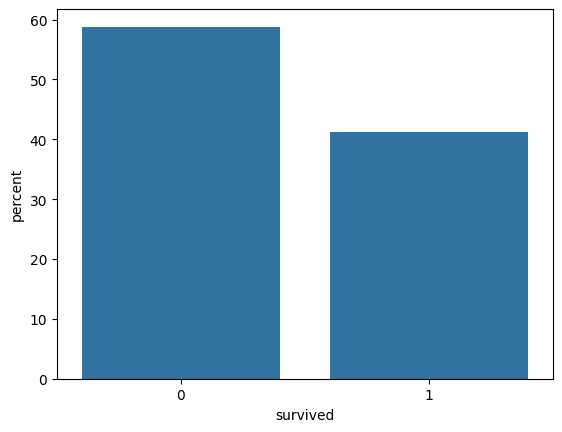

In [26]:
# Comprobamos la frecuencia de la variable target

sns.countplot(data=df, x="survived", stat="percent");

*Hay cierto desbalanceo en los datos: 60% no sobrevivieron y 40% sí que sobrevivieron*

Como nos piden dividir entre train y test asegurando que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades, no vamos a estratificar con la variable target "survived" sino que lo haremos \
con la variable "embark_town"

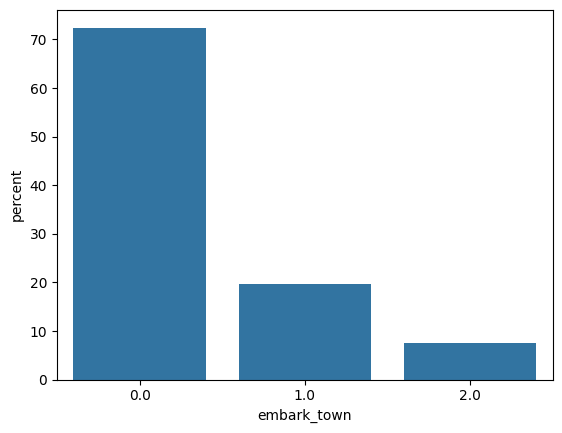

In [27]:
# Vamos a ver primero las frecuencias de la variable "embark_town" para comprobar su balanceo/desbalanceo
# Recordemos: 0 - Southampton, 1 - Cherbourg, 2 - Queenstown

sns.countplot(data=df, x="embark_town", stat="percent");

*Está bastante desbalanceado*

Hacemos el split entre train y test

In [28]:
# Como tenemos nulos en la variable "embarked_town" vamos a asignarle el valor 3

df["embark_town"].fillna(3.0, inplace=True)

C:\Users\ancar\AppData\Local\Temp\ipykernel_9408\4157909067.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["embark_town"].fillna(3.0, inplace=True)
C:\Users\ancar\AppData\Local\Temp\ipykernel_9408\4157909067.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["embark_town"].fillna(3.0, inplace=True)


In [29]:
# Comprobamos que se haya aplicado correctamente 

print(df["embark_town"].isnull().sum())  # Esto debería devolver 0

0


In [30]:
# Dividimos entre train y test

train_set, test_set = train_test_split(df, test_size=0.2, stratify=df["embark_town"], random_state=42)

In [31]:
# Comprobamos la frecuencia de "embark_town" en los dataset de train y set, y así ver la estratificación 

train_set["embark_town"].value_counts(normalize = True)

embark_town
0.0    0.724083
1.0    0.197767
2.0    0.074960
3.0    0.003190
Name: proportion, dtype: float64

In [32]:
test_set["embark_town"].value_counts(normalize = True)

embark_town
0.0    0.726115
1.0    0.197452
2.0    0.076433
Name: proportion, dtype: float64

*Ha quedado bastante mal la estratificación en el train y test debido a que hay muy pocos datos de Cherbourg (1), Queenstown (2) y nulos (3)* \
*Para ello se podría reducir el tamaño del split, aumentar la muestra, agrupar los valores con porcentajes más pequeños y hacer una única categoría.. En nuestro caso, vamos a dejarlo tal cual está*

In [33]:
# Definimos la variable Target en una variable concreta

target = "survived"

# Generamos las parejas X,y de train y test

X_train = train_set.drop(target, axis = 1)
y_train = train_set[target]
X_test = test_set.drop(target, axis = 1)
y_test = test_set[target]

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(627, 14)
(157, 14)
(627,)
(157,)


In [35]:
# Imputamos los nulos con las medias y modas en X_train. Recordemos que hay nulos en las columnas "age", "embarked", "deck" y "embark_town"

# Medias: age

mean_age = X_train["age"].mean()

X_train.loc[X_train["age"].isna(),"age"] = X_train["age"].mean()
X_train["age"].info()

<class 'pandas.core.series.Series'>
Index: 627 entries, 268 to 485
Series name: age
Non-Null Count  Dtype  
--------------  -----  
627 non-null    float64
dtypes: float64(1)
memory usage: 9.8 KB


In [36]:
# Moda: embarked, deck y embark_town

mode_embarked = X_train["embarked"].mode()[0]
X_train.loc[X_train["embarked"].isna(), "embarked"] = mode_embarked

mode_deck = X_train["deck"].mode()[0]
X_train.loc[X_train["deck"].isna(), "deck"] = mode_deck

mode_embark_town = X_train["embark_town"].mode()[0]
X_train.loc[X_train["embark_town"].isna(), "embark_town"] = mode_embark_town

In [37]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 627 entries, 268 to 485
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       627 non-null    int64  
 1   sex          627 non-null    int64  
 2   age          627 non-null    float64
 3   sibsp        627 non-null    int64  
 4   parch        627 non-null    int64  
 5   fare         627 non-null    float64
 6   embarked     627 non-null    float64
 7   class        627 non-null    int64  
 8   who          627 non-null    int64  
 9   adult_male   627 non-null    int64  
 10  deck         627 non-null    float64
 11  embark_town  627 non-null    float64
 12  alive        627 non-null    int64  
 13  alone        627 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 73.5 KB


In [38]:
# Hacemos lo mismo para train_set, pero cogemos ya las medias y modas calculadas

train_set.loc[train_set["age"].isna(),"age"] = mean_age

train_set.loc[train_set["embarked"].isna(), "embarked"] = mode_embarked
train_set.loc[train_set["deck"].isna(), "deck"] = mode_deck
train_set.loc[train_set["embark_town"].isna(), "embark_town"] = mode_embark_town

train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 627 entries, 268 to 485
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     627 non-null    int64  
 1   pclass       627 non-null    int64  
 2   sex          627 non-null    int64  
 3   age          627 non-null    float64
 4   sibsp        627 non-null    int64  
 5   parch        627 non-null    int64  
 6   fare         627 non-null    float64
 7   embarked     627 non-null    float64
 8   class        627 non-null    int64  
 9   who          627 non-null    int64  
 10  adult_male   627 non-null    int64  
 11  deck         627 non-null    float64
 12  embark_town  627 non-null    float64
 13  alive        627 non-null    int64  
 14  alone        627 non-null    int64  
dtypes: float64(5), int64(10)
memory usage: 78.4 KB


Hacemos un mini EDA de los datos de train

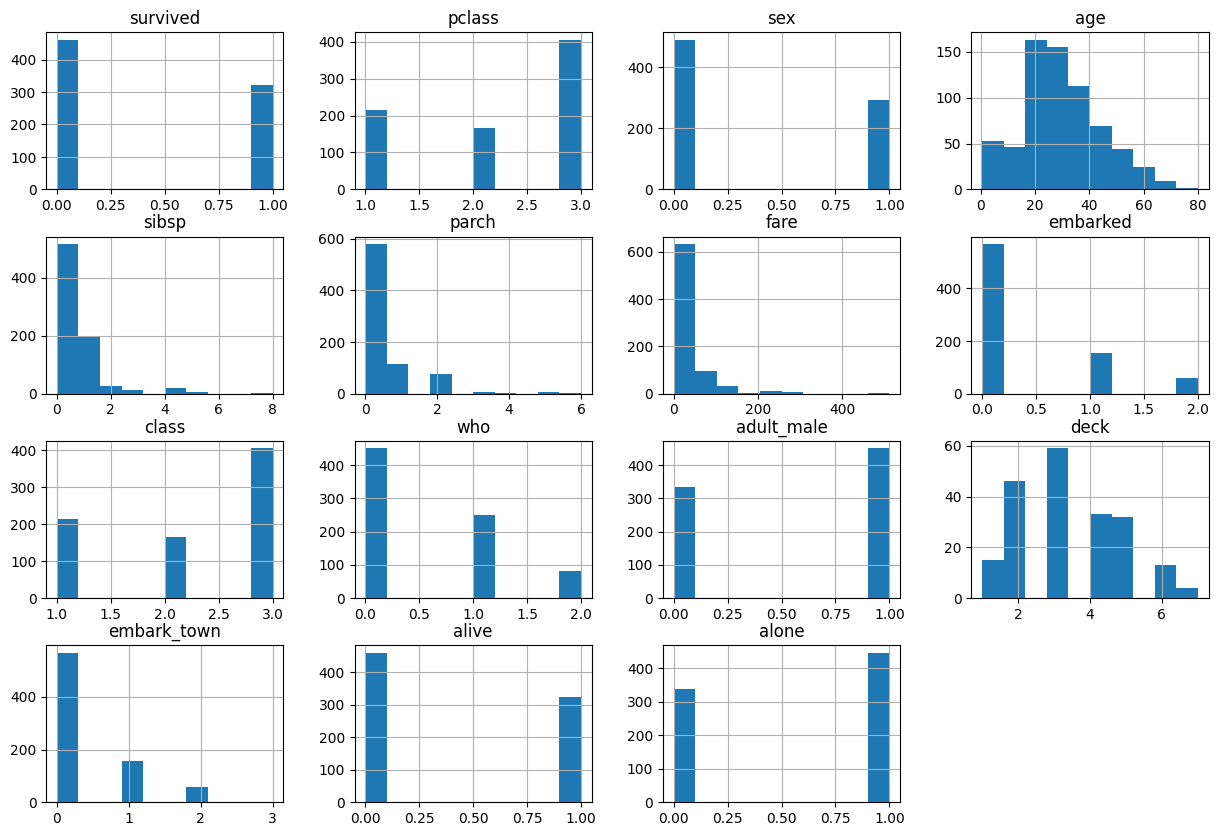

In [39]:
df.hist(figsize=(15, 10));

In [40]:
corr_matrix = train_set.corr(numeric_only= True)
corr_matrix["survived"].sort_values(ascending = False)

survived       1.000000
alive          1.000000
sex            0.508177
who            0.414388
fare           0.227897
deck           0.101048
embark_town    0.083486
embarked       0.067663
parch          0.053817
age           -0.042743
sibsp         -0.059323
alone         -0.166641
pclass        -0.351572
class         -0.351572
adult_male    -0.510832
Name: survived, dtype: float64

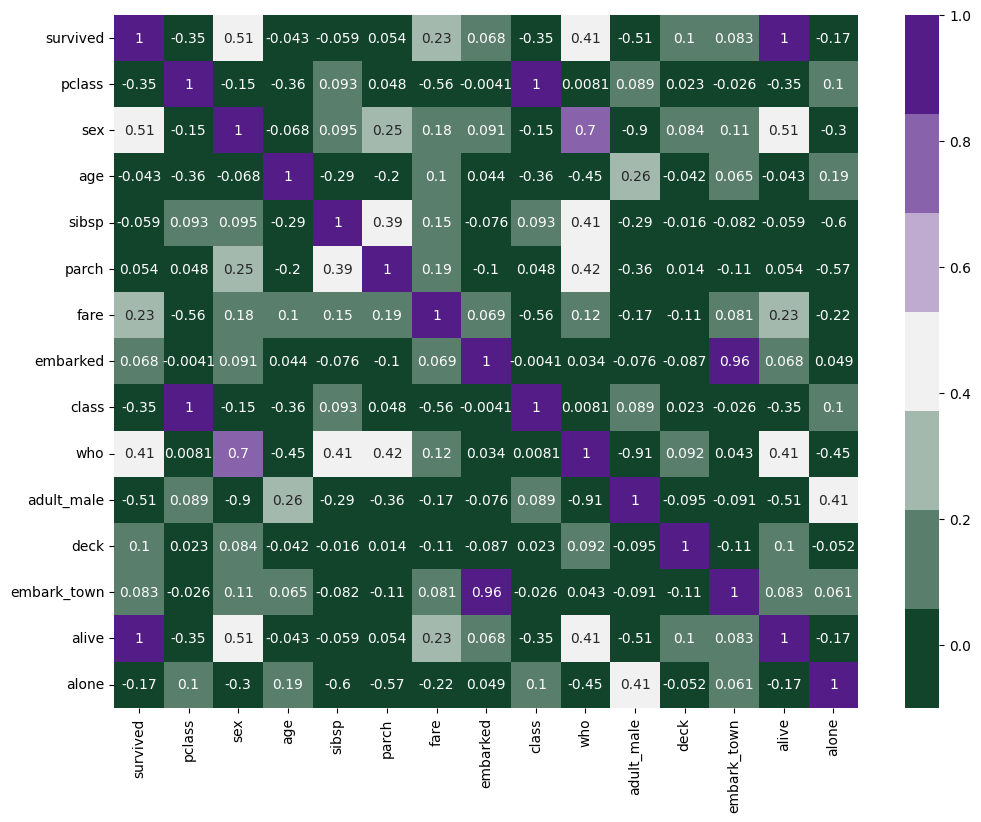

In [41]:
# Comprobamos las correlaciones entre las variables

plt.figure(figsize=(12, 9))
sns.heatmap(train_set.corr(),
           vmin=-0.1,
           vmax=1,
           cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
           annot=True);

In [42]:
corr_matrix = train_set.corr(numeric_only= True)
corr_matrix["survived"].abs().sort_values(ascending = False)

survived       1.000000
alive          1.000000
adult_male     0.510832
sex            0.508177
who            0.414388
class          0.351572
pclass         0.351572
fare           0.227897
alone          0.166641
deck           0.101048
embark_town    0.083486
embarked       0.067663
sibsp          0.059323
parch          0.053817
age            0.042743
Name: survived, dtype: float64

In [43]:
# Vamos a eliminar las columnas con correlación < 0.15 en train_set y X_train (luego habrá que hacerlo en X_test)

train_set.drop(columns=["deck", "embark_town", "embarked", "sibsp", "parch", "age"], inplace=True)
X_train.drop(columns=["deck", "embark_town", "embarked", "sibsp", "parch", "age"], inplace=True)

In [44]:
features_num = train_set.columns

In [45]:
features_num

Index(['survived', 'pclass', 'sex', 'fare', 'class', 'who', 'adult_male',
       'alive', 'alone'],
      dtype='object')

*Nota: no tendríamos que haber modificado las variables categóricas a continuas al principio del todo sino antes de ir a entrenar el algoritmo para que sea más correcto; sin embargo, lo vamos a dejar así en este ejercicio* \
*Aprendizaje para el próximo ejercicio a realizar* 

In [46]:
# Comprobamos la colinealidad

criterio_col = 0.7
excluidas = []
for col in features_num:
    print(f"Voy a comprobar la colinealidad con {col}")
    if col not in excluidas:
        for col_2,valor_corr in corr_matrix[col].items():
            print(f"Comprobando con {col_2}")
            if col != col_2 and col_2 in features_num:
                if np.abs(valor_corr) >= criterio_col:
                    print(f"Correlo al {valor_corr}, por eso excluyo a {col_2}")
                    print("------------")
                    excluidas.append(col_2)
                else:
                    print(f"Conmigo no tiene problema, dejo a {col_2} tranquila")
                    print("------------")
            elif col == col_2:
                print("Soy yo misma, no me excluyo")
                print("------------")
            else:
                print("No estaba ya en la lista original, no hago nada")
                print("------------")
    
excluidas = list(set(excluidas))

Voy a comprobar la colinealidad con survived
Comprobando con survived
Soy yo misma, no me excluyo
------------
Comprobando con pclass
Conmigo no tiene problema, dejo a pclass tranquila
------------
Comprobando con sex
Conmigo no tiene problema, dejo a sex tranquila
------------
Comprobando con age
No estaba ya en la lista original, no hago nada
------------
Comprobando con sibsp
No estaba ya en la lista original, no hago nada
------------
Comprobando con parch
No estaba ya en la lista original, no hago nada
------------
Comprobando con fare
Conmigo no tiene problema, dejo a fare tranquila
------------
Comprobando con embarked
No estaba ya en la lista original, no hago nada
------------
Comprobando con class
Conmigo no tiene problema, dejo a class tranquila
------------
Comprobando con who
Conmigo no tiene problema, dejo a who tranquila
------------
Comprobando con adult_male
Conmigo no tiene problema, dejo a adult_male tranquila
------------
Comprobando con deck
No estaba ya en la list

In [47]:
excluidas

['class', 'adult_male', 'alive']

In [48]:
# Vamos a eliminar las columnas con correlación > 0.7 en train_set y X_train (luego habrá que hacerlo en X_test)

train_set.drop(columns=["class", "adult_male", "alive"], inplace=True)
X_train.drop(columns=["class", "adult_male", "alive"], inplace=True)

In [49]:
corr_matrix = train_set.corr(numeric_only= True)
corr_matrix["survived"].abs().sort_values(ascending = False)

survived    1.000000
sex         0.508177
who         0.414388
pclass      0.351572
fare        0.227897
alone       0.166641
Name: survived, dtype: float64

Tratamos las variables continuas para que se adapten lo mejor posible al modelo

In [50]:
train_set.columns

Index(['survived', 'pclass', 'sex', 'fare', 'who', 'alone'], dtype='object')

*Nos quedamos con las features: "pclass", "sex", "fare", "who", "alone"*

In [51]:
def plot_histo_den(df, columns):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

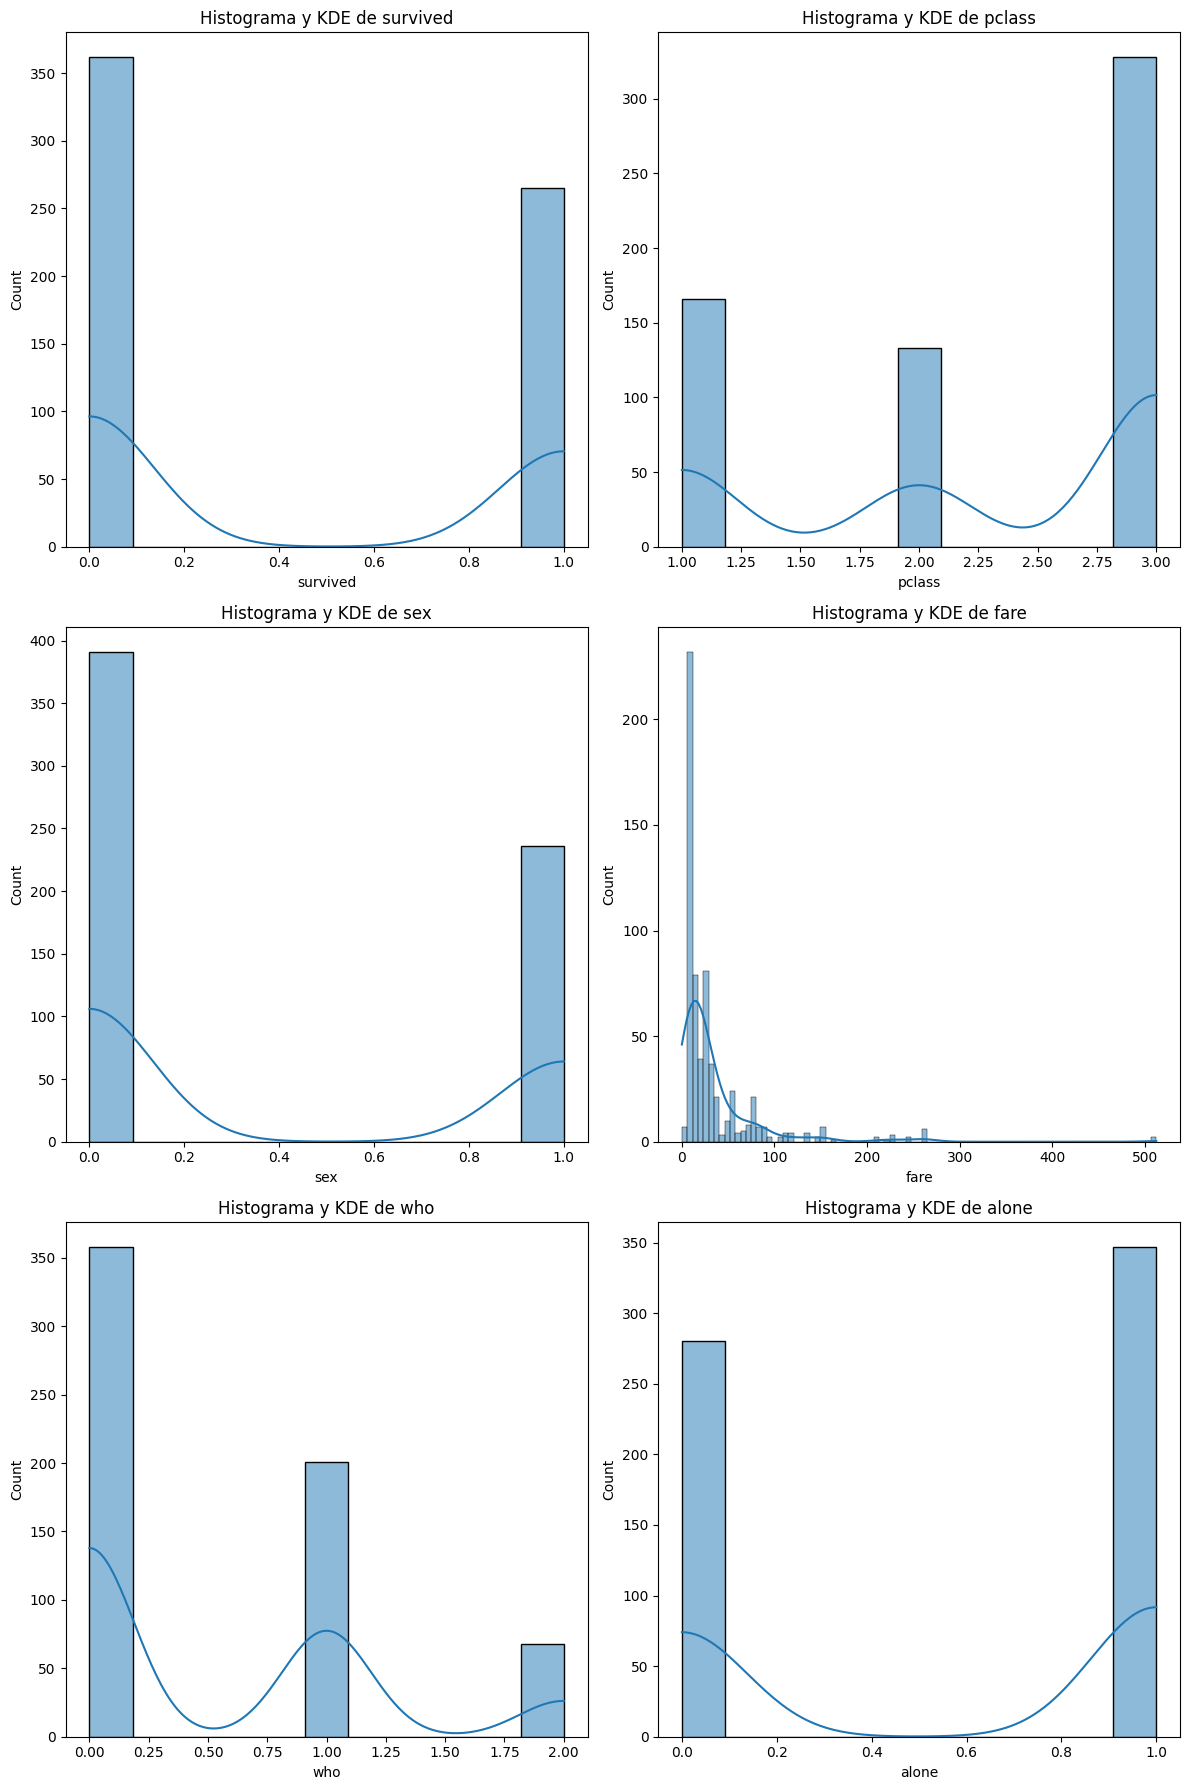

In [52]:
plot_histo_den(train_set, train_set.columns)

*La variable a la que se le podría aplicar el logaritmo sería "fare"*

In [53]:
# Eliminamos las 5 filas donde el precio del billete = 0 para poderle aplicar el logaritmo

train_set = train_set[train_set["fare"] > 0]

In [54]:
features_transform = ["fare"]

for feature in features_transform:
    train_set[feature] = train_set[feature].apply(np.log)
    X_train[feature] = X_train[feature].apply(np.log)

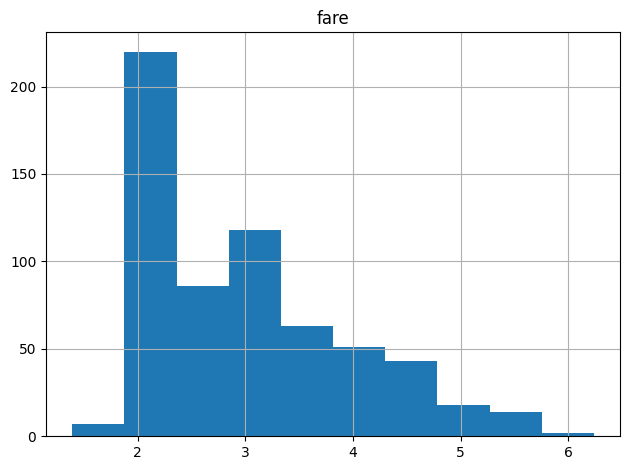

In [55]:
train_set[features_transform].hist()
plt.tight_layout();

(2,)


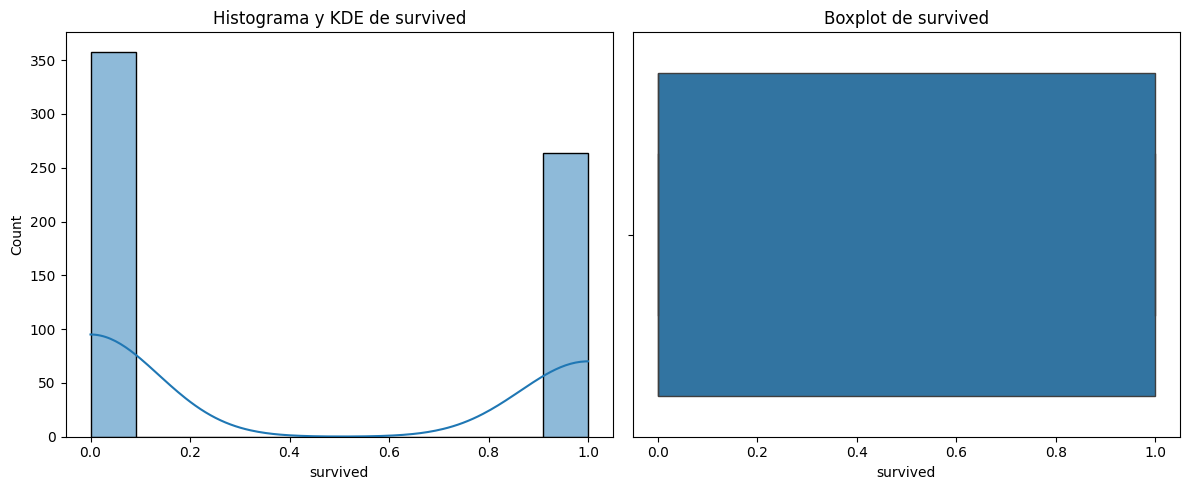

(2,)


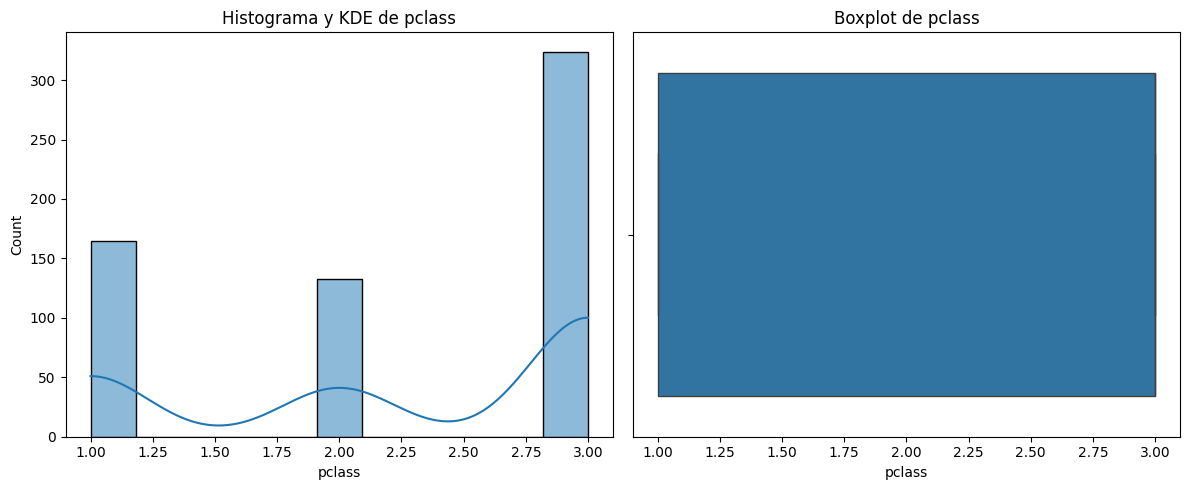

(2,)


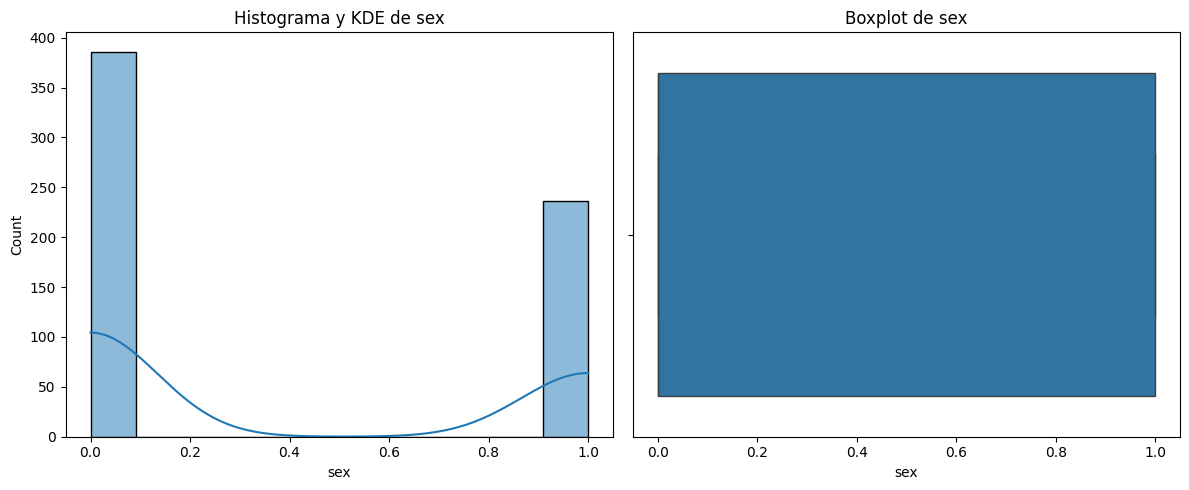

(2,)


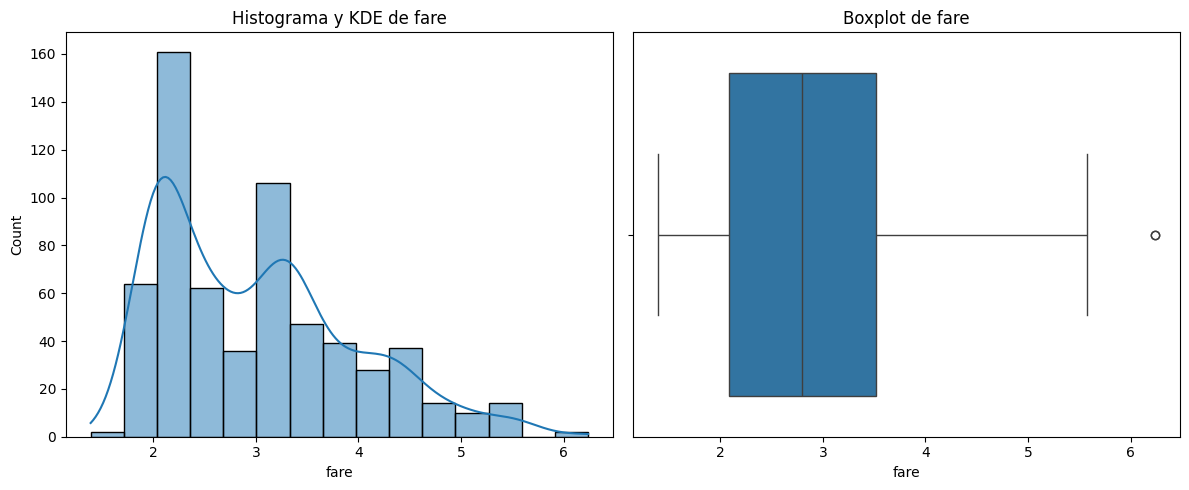

(2,)


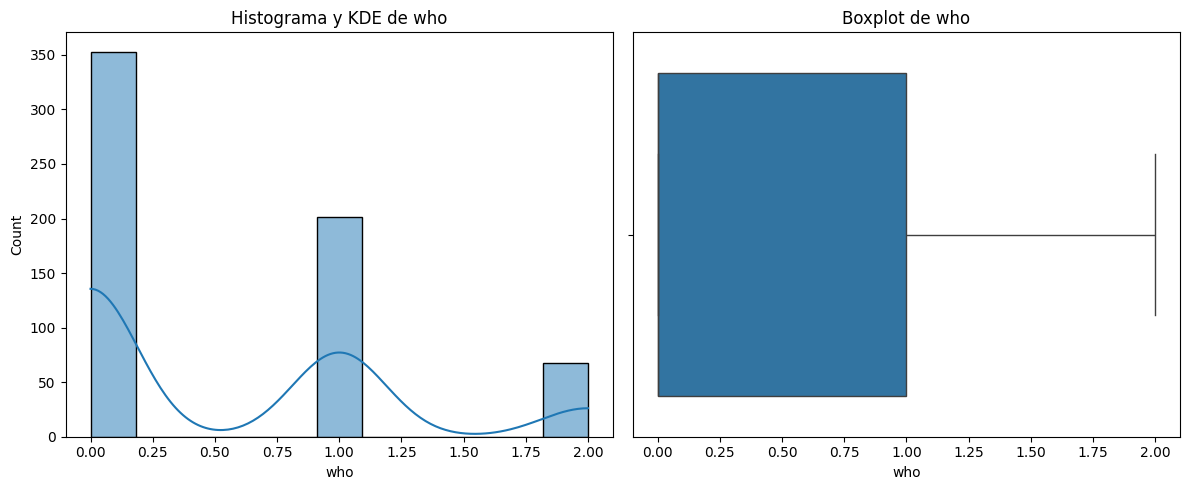

(2,)


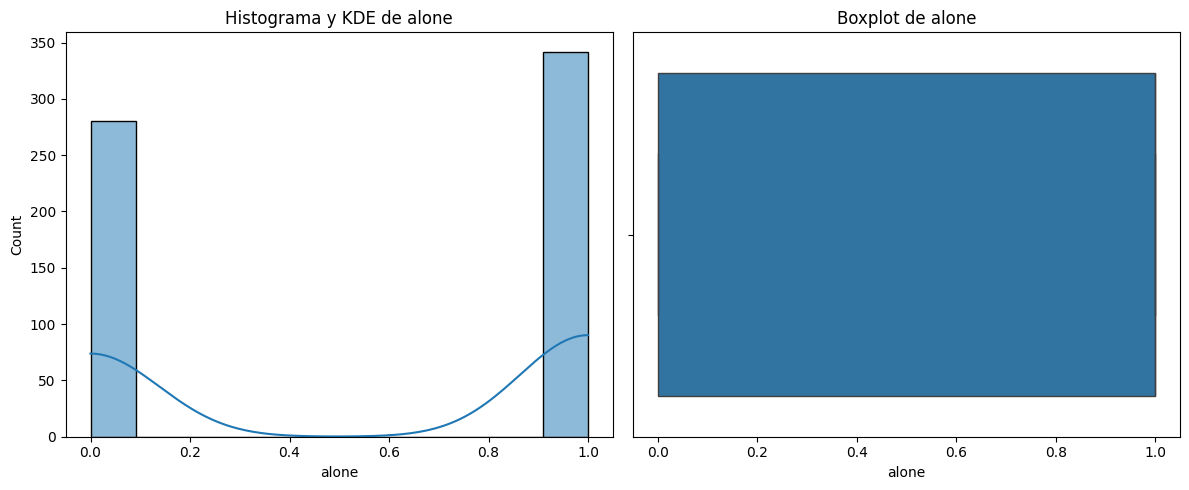

In [56]:
for columna in train_set.columns:
    plot_combined_graphs(train_set, [columna])

*No hay outliers en la variable "fare"*

In [57]:
train_set.describe()

,survived,pclass,sex,fare,who,alone
count,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000
mean,0.424437,2.255627,0.379421,3.005925,0.541801,0.549839
std,0.494655,0.849699,0.485634,0.945850,0.683852,0.497910
min,0.000000,1.000000,0.000000,1.389414,0.000000,0.000000
25%,0.000000,1.000000,0.000000,2.085672,0.000000,0.000000
50%,0.000000,3.000000,0.000000,2.797114,0.000000,1.000000
75%,1.000000,3.000000,1.000000,3.519356,1.000000,1.000000
max,1.000000,3.000000,1.000000,6.238967,2.000000,1.000000


*No hace falta aplicar la estandarización*

En caso de que hubiera hecho falta hubieramos seguido estos pasos (son más correctos):

In [58]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# scaler.fit(train_set[features_num])
# train_set[features_num] =scaler.transform(train_set[features_num])
# test_set[features_num] = scaler.transform(test_set[features_num])

Construimos el modelo de regresión lineal

In [59]:
X_train.columns

Index(['pclass', 'sex', 'fare', 'who', 'alone'], dtype='object')

In [60]:
# Ahora creamos las variables X,y para los datos de entrenamiento tras todo el trabajo previo

features = ['pclass', 'sex', 'fare', 'who', 'alone']

X = train_set[features].copy()
y = train_set[target]

In [61]:
# Creamos el modelo de regresión logística

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=10000)
clf.fit(X,y)

LogisticRegression(max_iter=10000)

In [62]:
clf.coef_

array([[-1.32781818,  1.54484748, -0.36562181,  0.94376596,  0.05774775]])

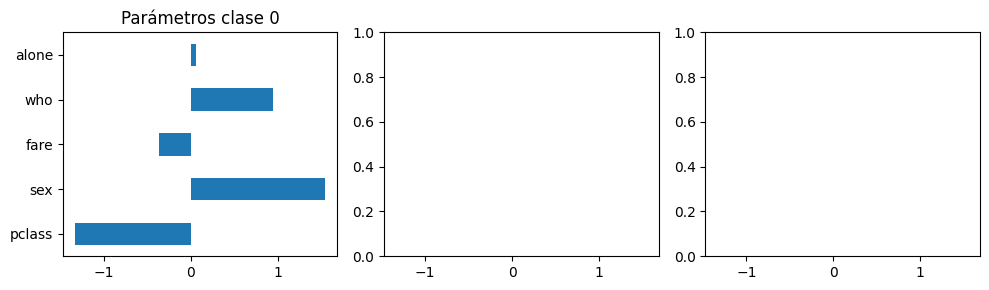

In [63]:
df_coefs = pd.DataFrame(clf.coef_, columns=X.columns)

fig, ax = plt.subplots(1, 3, figsize=(10, 3), sharex=True)
for i, subdf in df_coefs.iterrows():
    subdf.plot(kind="barh", ax=ax[i])
    ax[i].set_title(f"Parámetros clase {i}")

fig.tight_layout()

In [64]:
# Vemos los coeficientes mejor en formato matriz

coef_df = pd.DataFrame(clf.coef_.T, X.columns, 
                      columns=['Coefficient'])
coef_df

,Coefficient
pclass,-1.327818
sex,1.544847
fare,-0.365622
who,0.943766
alone,0.057748


In [65]:
# Antes de continuar vamos a regularizar los datos de X_test

# Le aplicamos las medias y modas a los nulos

# Medias: age

test_set.loc[test_set["age"].isna(),"age"] = mean_age

# Moda: embarked, deck y embark_town

test_set.loc[test_set["embarked"].isna(), "embarked"] = mode_embarked
test_set.loc[test_set["deck"].isna(), "deck"] = mode_deck
test_set.loc[test_set["embark_town"].isna(), "embark_town"] = mode_embark_town

test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, 108 to 510
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     157 non-null    int64  
 1   pclass       157 non-null    int64  
 2   sex          157 non-null    int64  
 3   age          157 non-null    float64
 4   sibsp        157 non-null    int64  
 5   parch        157 non-null    int64  
 6   fare         157 non-null    float64
 7   embarked     157 non-null    float64
 8   class        157 non-null    int64  
 9   who          157 non-null    int64  
 10  adult_male   157 non-null    int64  
 11  deck         157 non-null    float64
 12  embark_town  157 non-null    float64
 13  alive        157 non-null    int64  
 14  alone        157 non-null    int64  
dtypes: float64(5), int64(10)
memory usage: 19.6 KB


In [66]:
# Eliminamos las mismas columnas que en train_test

test_set.drop(columns=["deck", "embark_town", "embarked", "sibsp", "parch", "age"], inplace=True)

In [67]:
test_set.drop(columns=["class", "adult_male", "alive"], inplace=True)

In [68]:
test_set[test_set["fare"] == 0].count()

survived    5
pclass      5
sex         5
fare        5
who         5
alone       5
dtype: int64

In [69]:
# Eliminamos las 5 filas donde el precio del billete = 0 para poderle aplicar el logaritmo

test_set = test_set[test_set["fare"] > 0]

In [70]:
features_transform = ["fare"]

for feature in features_transform:
    test_set[feature] = test_set[feature].apply(np.log)

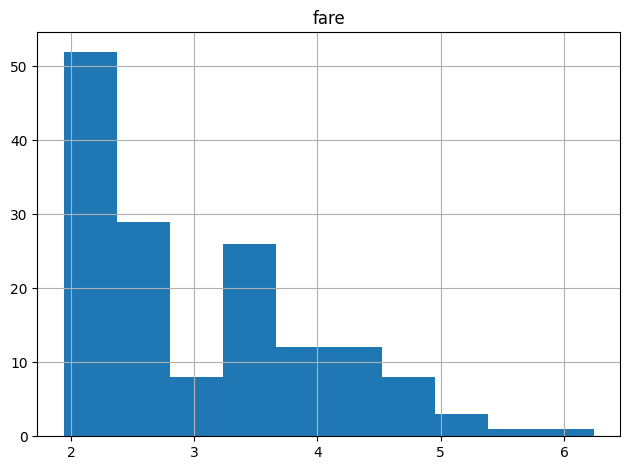

In [71]:
test_set[features_transform].hist()
plt.tight_layout();

In [72]:
# Ahora creamos las variables X,y para los datos de test tras todo el trabajo previo

X_test = test_set[features].copy()
y_test = test_set[target]

In [73]:
# Comprobamos el accuracy con los datos de train

acc_train = accuracy_score(y, clf.predict(X))
print(acc_train)

0.7797427652733119


In [74]:
# Validamos el modelo

name='Logistic Regression'
cv_results = model_selection.cross_val_score(clf, X, y, cv=5, scoring='accuracy')

msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results)
print(msg)

[0.72       0.752      0.84677419 0.73387097 0.75      ]
Logistic Regression: 0.760529 (0.044666)


*La precisión del modelo para los datos de train y valor 1 del target es regulera*

In [75]:
# Evaluamos el modelo

y_proba = clf.predict_proba(X_test)
y_pred = clf.predict(X_test)

In [76]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index=[f"Real {i}" for i in clf.classes_], 
                  columns=[f"Predicho {i}" for i in clf.classes_])

cm

,Predicho 0,Predicho 1
Real 0,77,17
Real 1,9,49


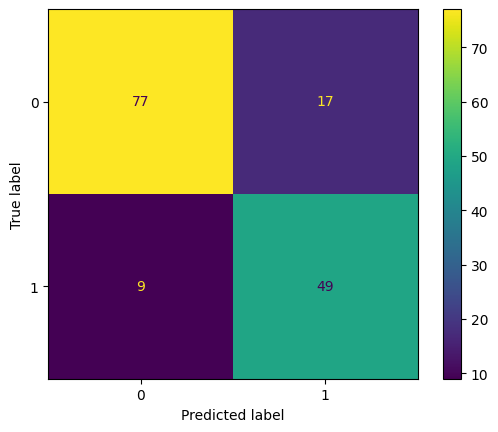

In [77]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

c:\Users\ancar\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


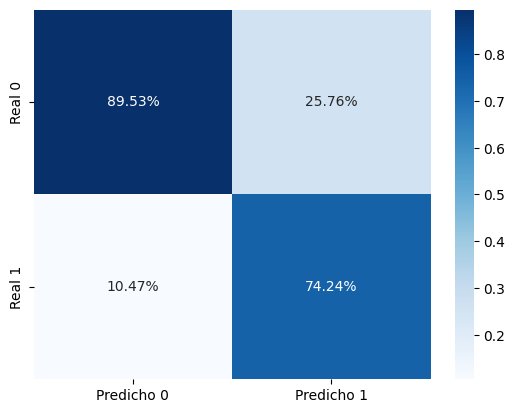

In [78]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues');

In [79]:
micro_prec = precision_score(y_test, y_pred, average="micro")
print("MICRO PRECISION:", micro_prec)

macro_prec = precision_score(y_test, y_pred, average="macro")
print("MACRO PRECISION:", macro_prec)

micro_rec = recall_score(y_test, y_pred, average="micro")
print("MICRO RECALL:", micro_rec)

macro_rec = recall_score(y_test, y_pred, average="macro")
print("MACRO RECALL:", macro_rec)

micro_acc = accuracy_score(y_test, y_pred)
print("MICRO ACCURACY:", micro_acc)

MICRO PRECISION: 0.8289473684210527
MACRO PRECISION: 0.8188865398167724
MICRO RECALL: 0.8289473684210527
MACRO RECALL: 0.8319882611885547
MICRO ACCURACY: 0.8289473684210527


In [80]:
acierto = accuracy_score(y_test, y_pred)

error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")

Acierto: 82.89 %
Error: 17.11 %


In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        94
           1       0.74      0.84      0.79        58

    accuracy                           0.83       152
   macro avg       0.82      0.83      0.82       152
weighted avg       0.84      0.83      0.83       152



AUROC: 0.89


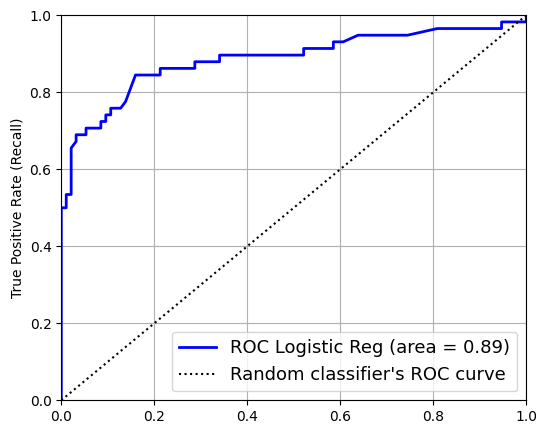

In [82]:
scores = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, scores[:,1])
roc_auc = auc(fpr,tpr)
print("AUROC: %.2f" %(roc_auc))
plt.figure(figsize=(6, 5))  
plt.plot(fpr, tpr, linewidth=2, color= "blue", label=f"ROC Logistic Reg (area = {roc_auc:0.2f})")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

In [83]:
# Vamos a calcular la precisión negativa y la especificidad para ver cómo de bueno es el modelo con los no supervivientes

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calcular precisión para la clase negativa
precision_negativa = tn / (tn + fp)

# Calcular especificidad
especificidad = tn / (tn + fp)

# Mostrar los resultados
print(f"Precisión para la clase negativa: {precision_negativa:.4f}")
print(f"Especificidad: {especificidad:.4f}")

Precisión para la clase negativa: 0.8191
Especificidad: 0.8191


*Sin embargo para los datos de test, parece que sí que se trata de un buen modelo, tanto para predecir valores del target "survived" iguales a 1 (sobrevivió) como para valores iguales a 0 (no sobrevivió)*